# Photo Classifier: Model evaluation

## Imports

In [1]:
from IPython.core.interactiveshell import InteractiveShell
%matplotlib inline
%load_ext autoreload
%autoreload 2
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import random
import numpy as np
import pandas as pd
from collections import Counter
from ipywidgets import interact
import ipywidgets as widgets

In [3]:
from file_io import load_pickle_file
from constants import *
from image_transforms import IMAGE_TRANSFORMS
from interpreters.utils import get_interpreter

In [4]:
import random
random.seed(42)

In [5]:
DATA_SET = 'test'

## Load model and data

In [6]:
model = load_pickle_file(MODEL_FILE_PATH)
image_data = load_pickle_file(IMAGE_DATA_PATH)

## Prediction

In [7]:
x = image_data.get_images(DATA_SET)
y_true = image_data.get_classes(DATA_SET)

In [8]:
y_pred, probabilities = model.predict(x, IMAGE_TRANSFORMS[DATA_SET])

## Results interpretation

In [9]:
Interpreter = get_interpreter(IS_MULTILABEL_CLASSIFICATION)
interpreter = Interpreter(x, y_pred, y_true, probabilities, model.class_to_label_mapping)

In [10]:
accuracy = interpreter.calculate_accuracy()
accuracy

0.978494623655914

In [11]:
accuracy_by_label = interpreter.calculate_accuracy_by_label()
accuracy_by_label

Teddybears       1.000000
Black bears      0.944444
Grizzly bears    1.000000
dtype: float64

In [12]:
confusion_matrix = interpreter.calculate_confusion_matrix()
confusion_matrix

,Teddybears,Black bears,Grizzly bears
Teddybears,29,0,0
Black bears,0,34,2
Grizzly bears,0,0,28


In [13]:
most_incorrect_samples = interpreter.get_most_incorrect_samples(5)
most_incorrect_samples

,Teddybears propability,Black bears propability,Grizzly bears propability,true,predicted,error,confidence
72,0.000066,0.168329,0.831605,[Black bears],[Grizzly bears],0.554447,0.761480
18,0.023784,0.296082,0.680133,[Black bears],[Grizzly bears],0.469278,0.571155
32,0.024402,0.667619,0.307979,[Black bears],[Black bears],0.221587,0.558339
91,0.000026,0.706682,0.293292,[Black bears],[Black bears],0.195545,0.614922
58,0.740534,0.142089,0.117377,[Teddybears],[Teddybears],0.172977,0.611176


In [14]:
most_uncertain_samples = interpreter.get_most_uncertain_samples(5)
most_uncertain_samples

,Teddybears propability,Black bears propability,Grizzly bears propability,true,predicted,error,confidence
32,0.024402,0.667619,0.307979,[Black bears],[Black bears],0.221587,0.558339
18,0.023784,0.296082,0.680133,[Black bears],[Grizzly bears],0.469278,0.571155
58,0.740534,0.142089,0.117377,[Teddybears],[Teddybears],0.172977,0.611176
91,0.000026,0.706682,0.293292,[Black bears],[Black bears],0.195545,0.614922
7,0.000009,0.794794,0.205198,[Black bears],[Black bears],0.136804,0.714636


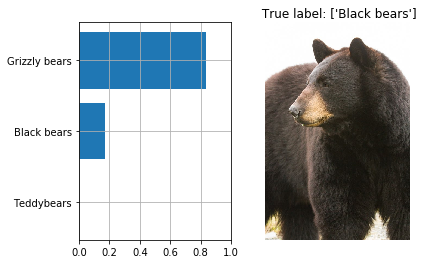

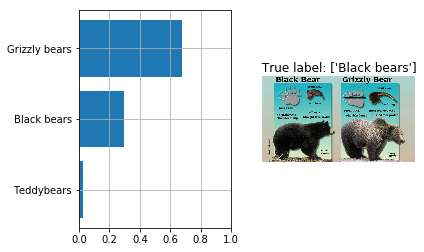

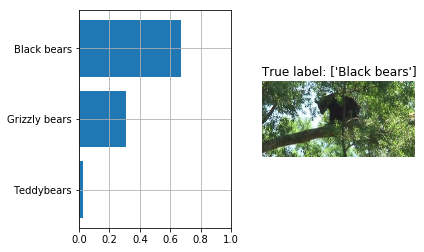

In [15]:
interpreter.plot_most_incorrect_samples(3)

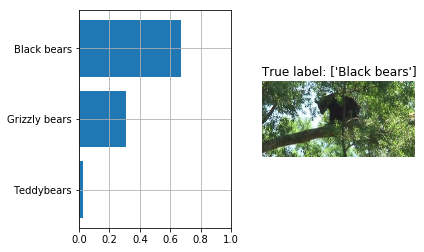

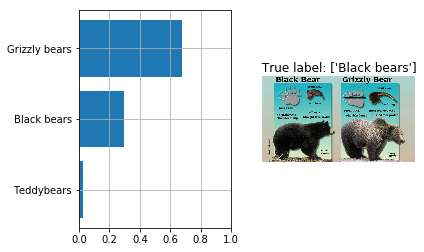

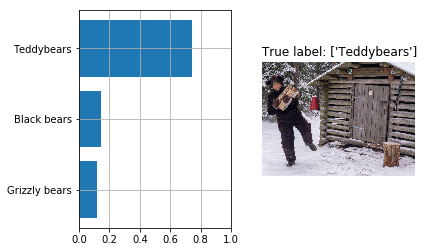

In [16]:
interpreter.plot_most_uncertain_samples(3)

In [17]:
@interact(index=widgets.IntSlider(min=0, max=len(y_true)-1, step=1, value=0, continuous_update=False))
def show_prediction(index=0):
    interpreter.plot_prediction(index)

interactive(children=(IntSlider(value=0, continuous_update=False, description='index', max=92), Output()), _do…